## Commentary on Twitter:

https://twitter.com/pjhawron/status/1440798472421052420

# Import data and libraries

#### Data from https://basketballdao.com and https://kongstats.com

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

warnings.filterwarnings("ignore")
% matplotlib inline

In [2]:
data = pd.read_csv("rkl.csv", index_col='Kong ID', nrows=10000)
data.head()

,Cumulative Stat Rank,Price,Cumulative,Visual Rarity URL,Shooting,Finish,Defense,Vision,Background,Fur,...,Head,Head Accessory,Eyes,Jewellery,Owner Address,Number of Sales,Last Sale Date,Last Sale Price,Last List Date,Current Price
Kong ID,,,,,,,,,,,,,,,,,,,,,
0,2572.0,,218,https://rarity.tools/rumble-kong-league/view/0,42,81,41,54,Gold,Grey,...,NaN,NaN,Bloodshot,NaN,0x465dca9995d6c2a81a9be80fbced5a770dee3dae,0,,,,
1,4113.0,,204,https://rarity.tools/rumble-kong-league/view/1,40,59,53,52,Light Grey,Brown,...,Green Beret,NaN,Angry,NaN,0xc212fc9e1a61b8400e0323fde83ed1fe359e3312,0,,,,
2,2461.0,,219,https://rarity.tools/rumble-kong-league/view/2,66,60,63,30,Light Blue,Grey,...,Green Beret,NaN,Closed,NaN,0x465dca9995d6c2a81a9be80fbced5a770dee3dae,0,,,,
3,1031.0,,237,https://rarity.tools/rumble-kong-league/view/3,45,74,55,63,Brown,Pink,...,NaN,NaN,Wide Scar,NaN,0xba351b8e093c40df954b9328484036fb271b4d86,0,,,,
4,3889.0,,206,https://rarity.tools/rumble-kong-league/view/4,46,45,55,60,Pink,White Noise,...,Cap Forward,NaN,Regular,NaN,0x05ae0683d8b39d13950c053e70538f5810737bc5,0,,,,


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 22 columns):
Cumulative Stat Rank    9999 non-null float64
Price                   9999 non-null object
Cumulative              10000 non-null int64
Visual Rarity URL       10000 non-null object
Shooting                10000 non-null int64
Finish                  10000 non-null int64
Defense                 10000 non-null int64
Vision                  10000 non-null int64
Background              10000 non-null object
Fur                     10000 non-null object
Clothes                 8235 non-null object
Mouth                   10000 non-null object
Head                    6622 non-null object
Head Accessory          2768 non-null object
Eyes                    10000 non-null object
Jewellery               62 non-null object
Owner Address           10000 non-null object
Number of Sales         10000 non-null int64
Last Sale Date          10000 non-null object
Last Sale Price         10000 n

# Cumulative Boost Distribution

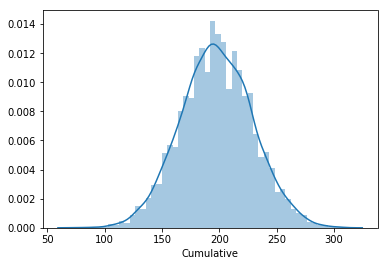

In [4]:
sns.distplot(data['Cumulative'])

In [9]:
mean = data['Cumulative'].mean()
print(mean)

197.7409


In [10]:
sd = data['Cumulative'].std()
print(sd)

31.38767410622485


# Dividing divisions into groups of increasing size

In [11]:
print(str(len(data[data['Cumulative'].between(mean+sd*2, 400, inclusive=True)])) + ' Kongs')
print('~' + str(int(np.floor(len(data[data['Cumulative'].between(mean+sd*2, 400, inclusive=True)])/3))) + ' Teams')

248 Kongs
~82 Teams


In [12]:
print(str(len(data[data['Cumulative'].between(mean+sd*1.5, mean+sd*2, inclusive=True)])) + ' Kongs')
print('~' + str(int(np.floor(len(data[data['Cumulative'].between(mean+sd*1.5, mean+sd*2, inclusive=True)])/3))) + ' Teams')

441 Kongs
~147 Teams


In [13]:
print(str(len(data[data['Cumulative'].between(mean+sd, mean+sd*1.5, inclusive=True)])) + ' Kongs')
print('~' + str(int(np.floor(len(data[data['Cumulative'].between(mean+sd, mean+sd*1.5, inclusive=True)])/3))) + ' Teams')

819 Kongs
~273 Teams


In [14]:
print(str(len(data[data['Cumulative'].between(mean+sd*0.5, mean+sd, inclusive=True)])) + ' Kongs')
print('~' + str(int(np.floor(len(data[data['Cumulative'].between(mean+sd*0.5, mean+sd, inclusive=True)])/3))) + ' Teams')

1584 Kongs
~528 Teams


In [15]:
print(str(len(data[data['Cumulative'].between(mean-sd*0.25, mean+sd*0.5, inclusive=True)])) + ' Kongs')
print('~' + str(int(np.floor(len(data[data['Cumulative'].between(mean-sd*0.25, mean+sd*0.5, inclusive=True)])/3))) + ' Teams')

2923 Kongs
~974 Teams


In [16]:
print(str(len(data[data['Cumulative'].between(0, mean-sd*0.25, inclusive=True)])) + ' Kongs')
print('~' + str(int(np.floor(len(data[data['Cumulative'].between(0, mean-sd*0.25, inclusive=True)])/3))) + ' Teams')

3985 Kongs
~1328 Teams


# Creating dataframe to plot

In [27]:
filters = [
    data['Cumulative'].between(mean+sd*2, 400, inclusive=True),
    data['Cumulative'].between(mean+sd*1.5, mean+sd*2, inclusive=True),
    data['Cumulative'].between(mean+sd, mean+sd*1.5, inclusive=True),
    data['Cumulative'].between(mean+sd*0.5, mean+sd, inclusive=True),
    data['Cumulative'].between(mean-sd*0.25, mean+sd*0.5, inclusive=True),
    data['Cumulative'].between(0, mean-sd*0.25, inclusive=True)
]

values = [1, 2, 3, 4, 5, 6]

In [18]:
data['Division'] = np.select(filters, values)

In [19]:
data[['Division', 'Cumulative']].head()

,Division,Cumulative
Kong ID,,
0,4,218
1,5,204
2,4,219
3,3,237
4,5,206


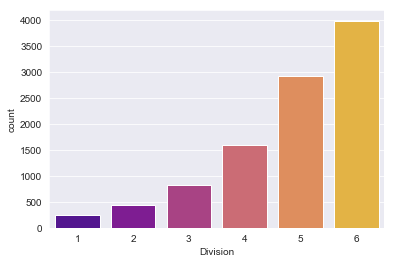

In [20]:
sns.set_style('darkgrid')
sns.set_palette('plasma')
sns.countplot(data['Division'])

# Cumulative boost ranges for each division

In [29]:
print('Divison 1:', int(np.floor(mean+sd*2)), 'to', 400)
print('Divison 2:', int(np.floor(mean+sd*1.5)), 'to', int(np.floor(mean+sd*2)))
print('Divison 3:', int(np.floor(mean+sd)), 'to', int(np.floor(mean+sd*1.5)))
print('Divison 4:', int(np.floor(mean+sd*0.5)), 'to', int(np.floor(mean+sd)))
print('Divison 5:', int(np.floor(mean-sd*0.25)), 'to', int(np.floor(mean+sd*0.5)))
print('Divison 6:', 0, 'to', int(np.floor(mean-sd*0.25)))

Divison 1: 260 to 400
Divison 2: 244 to 260
Divison 3: 229 to 244
Divison 4: 213 to 229
Divison 5: 189 to 213
Divison 6: 0 to 189


# Stats table for hypothetical divisions

In [31]:
div_temp = {'Division': [1, 2, 3, 4, 5, 6],
            'Floor Price': [7.5, 3.75, 2.5, 1.85, 1.45, 1.44],
            'Min Boost': [int(np.floor(mean+sd*2)), int(np.floor(mean+sd*1.5)), int(np.floor(mean+sd)), int(np.floor(mean+sd*0.5)), int(np.floor(mean-sd*0.25)), 0],
            'Max Boost': [400, int(np.floor(mean+sd*2)), int(np.floor(mean+sd*1.5)), int(np.floor(mean+sd)), int(np.floor(mean+sd*0.5)), int(np.floor(mean-sd*0.25))],
            'Total Kongs': [len(data[data['Cumulative'].between(mean+sd*2, 400, inclusive=True)]), len(data[data['Cumulative'].between(mean+sd*1.5, mean+sd*2, inclusive=True)]), len(data[data['Cumulative'].between(mean+sd, mean+sd*1.5, inclusive=True)]), len(data[data['Cumulative'].between(mean+sd*0.5, mean+sd, inclusive=True)]), len(data[data['Cumulative'].between(mean-sd*0.25, mean+sd*0.5, inclusive=True)]), len(data[data['Cumulative'].between(0, mean-sd*0.25, inclusive=True)])],
            'Max Teams': [int(np.floor(len(data[data['Cumulative'].between(mean+sd*2, 400, inclusive=True)])/3)), int(np.floor(len(data[data['Cumulative'].between(mean+sd*1.5, mean+sd*2, inclusive=True)])/3)), int(np.floor(len(data[data['Cumulative'].between(mean+sd, mean+sd*1.5, inclusive=True)])/3)), int(np.floor(len(data[data['Cumulative'].between(mean+sd*0.5, mean+sd, inclusive=True)])/3)), int(np.floor(len(data[data['Cumulative'].between(mean-sd*0.25, mean+sd*0.5, inclusive=True)])/3)), int(np.floor(len(data[data['Cumulative'].between(0, mean-sd*0.25, inclusive=True)])/3))]
}
division_stats = pd.DataFrame(div_temp, index=div_temp['Division'])
division_stats

,Division,Floor Price,Min Boost,Max Boost,Total Kongs,Max Teams
1,1,7.50,260,400,248,82
2,2,3.75,244,260,441,147
3,3,2.50,229,244,819,273
4,4,1.85,213,229,1584,528
5,5,1.45,189,213,2923,974
6,6,1.44,0,189,3985,1328
